In [7]:
# !conda install -y -c conda-forge fbprophet
# !pip install mlflow
# !pip install --upgrade pandas
import sagemaker
import pandas as pd
import s3fs
from fbprophet import Prophet
import mlflow
from mlflow.pyfunc import log_model
from fbprophet.diagnostics import cross_validation, performance_metrics
from mlflow.tracking import MlflowClient

In [8]:
# ##backend set up:
# dialect = 'postgresql'
# driver = 'jdbc' ## need to check whether dialect and driver are switched.
# username = 'postgres'
# # password = ## still need to figure out authentication
# host = 'mlruns.cjwgnze04ktm.us-east-2.rds.amazonaws.com'
# port = '5432'
# database = 'mlruns'
# sqlalchemy_db_name = f'{dialect}+{driver}://{username}:{password}@{host}:{port}/{database}'

In [9]:
## vars
bucket = sagemaker.Session().default_bucket()
folder = 'stock-data-raw-csv'
fs = s3fs.S3FileSystem()
files = fs.ls(f's3://{bucket}/{folder}')
metric = 'high' ##'low_window_20_shift_0_mean_percent_change_percent_lag_90_shift_-90'
rolling_window=0.1
##mlflow setup
artifact_uri = f's3://{bucket}/mlflow_artifacts/fbprophet'
tracking_uri = './mlruns' ## 
mlflow.set_tracking_uri(tracking_uri)
display(mlflow.get_tracking_uri())
try:
    exp_id = mlflow.create_experiment('fbprophet_all_', artifact_location=artifact_uri)
except Exception as e:
    display(e)
    exp_id= mlflow.get_experiment_by_name('fbprophet_all_').experiment_id

'./mlruns'

mlflow.exceptions.MlflowException("Experiment 'fbprophet_all_' already exists.")

## Initial run to screen stocks for greatest returns based on prediction

In [ ]:
# for file in files:
#     with mlflow.start_run(run_name=file, experiment_id=exp_id):
#         try:
#             periods=90
#             mlflow.log_params({'file' : file,
#                               'metric' : metric,
#                               'rolling_window' : rolling_window,
#                               'prediction_length' : periods})
#             ## load dataframe
#             dft = pd.read_csv(f's3://{file}')#.dropna()
#             df = dft[['Unnamed: 0', metric]]
#             df.columns = ['ds', 'y']
#             ## drop small stocks
#             if df.y.values[-1] < 4: ## latest value less than 4
#                 mlflow.log_param('small_stock', True)
#                 continue
#             mlflow.log_param('small_stock', False)
#             ## fit and prediction
#             m = Prophet(growth='linear', daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
#             m.fit(df)
#             future = m.make_future_dataframe(periods=periods)
#             forecast = m.predict(future)
        
#             ## percent change analysis    
#             yhat = forecast.loc[len(forecast.index)-1, 'yhat']
#             y = df.loc[len(df.index)-1, 'y']
#             percent_change = (yhat-y)/y
#             mlflow.log_metric('percent_change', percent_change)
#         except Exception as e:
#             display(e)
#             mlflow.log_param('exception', e)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
/opt/conda/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than numbe

ValueError('Dataframe has less than 2 non-NaN rows.')

INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fb

ValueError('Dataframe has less than 2 non-NaN rows.')

INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


ValueError('Dataframe has less than 2 non-NaN rows.')

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


ValueError('Dataframe has less than 2 non-NaN rows.')

INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


## following run for evaluating the predictions and visualizing them

In [11]:
runs = mlflow.search_runs(exp_id)
display(runs)

runs.sort_values('metrics.percent_change', inplace=True, ascending=False)


In [27]:
runs.sort_values('metrics.percent_change', inplace=True, ascending=False)
runs.to_csv('runs_df.csv')
with mlflow.start_run(run_name=file, experiment_id=exp_id):
    mlflow.log_artifact('runs_df.csv')
display(runs)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.percent_change,metrics..ipynb_checkpoints/percent_change-checkpoint,params.metric,params.file,params.small_stock,params.rolling_window,params.prediction_length,params.exception,params..ipynb_checkpoints/small_stock-checkpoint,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.source.name
3559,d38975c3aeda45d9bb4dc6a2b8733708,1,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 21:17:26.060000+00:00,2021-04-22 21:17:28.602000+00:00,244.686516,NaN,high,sagemaker-us-east-2-287085956542/stock-data-ra...,False,0.1,90,None,None,sagemaker-us-east-2-287085956542/stock-data-ra...,LOCAL,root,/opt/conda/lib/python3.7/site-packages/ipykern...
2174,a2f518f0056d4c66968a613a18105e93,1,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 23:16:23.605000+00:00,2021-04-22 23:16:26.358000+00:00,122.646956,NaN,high,sagemaker-us-east-2-287085956542/stock-data-ra...,False,0.1,90,None,None,sagemaker-us-east-2-287085956542/stock-data-ra...,LOCAL,root,/opt/conda/lib/python3.7/site-packages/ipykern...
561,dbcc6d5129704486ad76045ae56ac742,1,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-23 01:42:05.540000+00:00,2021-04-23 01:42:08.181000+00:00,102.740391,NaN,high,sagemaker-us-east-2-287085956542/stock-data-ra...,False,0.1,90,None,None,sagemaker-us-east-2-287085956542/stock-data-ra...,LOCAL,root,/opt/conda/lib/python3.7/site-packages/ipykern...
3584,7ddbf6fb20cf4535a7f1100dd401181d,1,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 21:15:24.657000+00:00,2021-04-22 21:15:26.918000+00:00,101.145114,NaN,high,sagemaker-us-east-2-287085956542/stock-data-ra...,False,0.1,90,None,None,sagemaker-us-east-2-287085956542/stock-data-ra...,LOCAL,root,/opt/conda/lib/python3.7/site-packages/ipykern...
4179,7f3d85648fb941d3b371ad4e82333890,1,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 20:27:25.576000+00:00,2021-04-22 20:27:28.113000+00:00,97.665466,NaN,high,sagemaker-us-east-2-287085956542/stock-data-ra...,False,0.1,90,None,None,sagemaker-us-east-2-287085956542/stock-data-ra...,LOCAL,root,/opt/conda/lib/python3.7/site-packages/ipykern...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,326374a4d90642c99681e672c759a8f8,1,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 20:04:49.593000+00:00,2021-04-22 20:04:49.874000+00:00,NaN,NaN,high,sagemaker-us-east-2-287085956542/stock-data-ra...,True,0.1,90,None,None,sagemaker-us-east-2-287085956542/stock-data-ra...,LOCAL,root,/opt/conda/lib/python3.7/site-packages/ipykern...
4508,350a97ea9d554a7b8afa310d3b432dda,1,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 20:04:33.620000+00:00,2021-04-22 20:04:33.918000+00:00,NaN,NaN,high,sagemaker-us-east-2-287085956542/stock-data-ra...,True,0.1,90,None,None,sagemaker-us-east-2-287085956542/stock-data-ra...,LOCAL,root,/opt/conda/lib/python3.7/site-packages/ipykern...
4510,a1e423af2da2433dbe9197dee6ac4e6e,1,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 20:04:30.625000+00:00,2021-04-22 20:04:30.905000+00:00,NaN,NaN,high,sagemaker-us-east-2-287085956542/stock-data-ra...,True,0.1,90,None,None,sagemaker-us-east-2-287085956542/stock-data-ra...,LOCAL,root,/opt/conda/lib/python3.7/site-packages/ipykern...
4519,9bb3f327a4854bfb93f820168b3ad176,1,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 20:03:29.070000+00:00,2021-04-22 20:03:29.375000+00:00,NaN,NaN,high,sagemaker-us-east-2-287085956542/stock-data-ra...,True,0.1,90,None,None,sagemaker-us-east-2-287085956542/stock-data-ra...,LOCAL,root,/opt/conda/lib/python3.7/site-packages/ipykern...


In [26]:
files = runs.reset_index().loc[:100, 'params.file'].tolist()
for file in files:
    df = pd.read_csv(f's3://{file}')
    if len(df.dropna().index) < 100:
        files.remove(file)
    if 
display(files)

['sagemaker-us-east-2-287085956542/stock-data-raw-csv/KRT.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/COIN.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/VELO.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/VENA.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/ZWZZT.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/BRPM.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/GSEV.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/CRZNU.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/GHVIU.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/RMGC.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/SLAM.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/KSICU.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/DUNE.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/EEIQ.csv',
 'sagemaker-us-east-2-287085956542/stock-data-raw-csv/ALHC.csv',
 'sagemaker-us-east-2-

mlflow.exceptions.MlflowException("Experiment 'fbprophet_top' already exists.")

'2'

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 0.
/opt/conda/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.
/opt/conda/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.fl

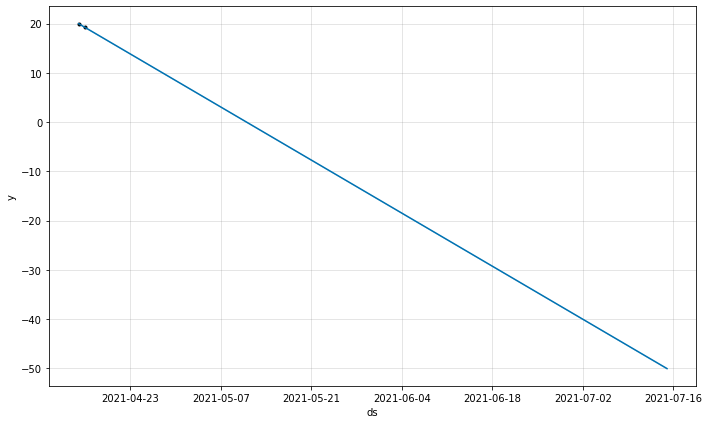

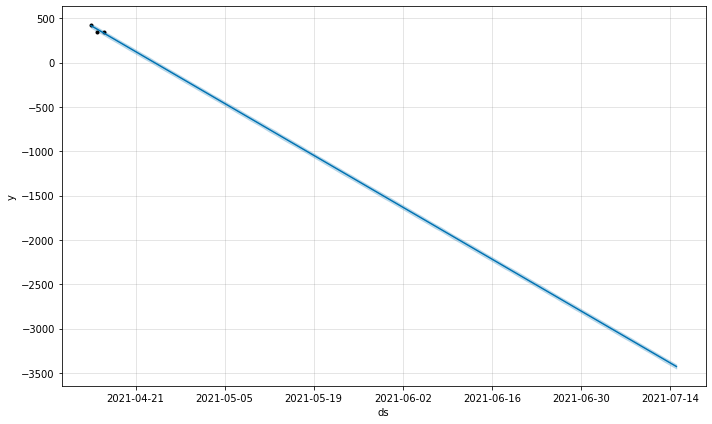

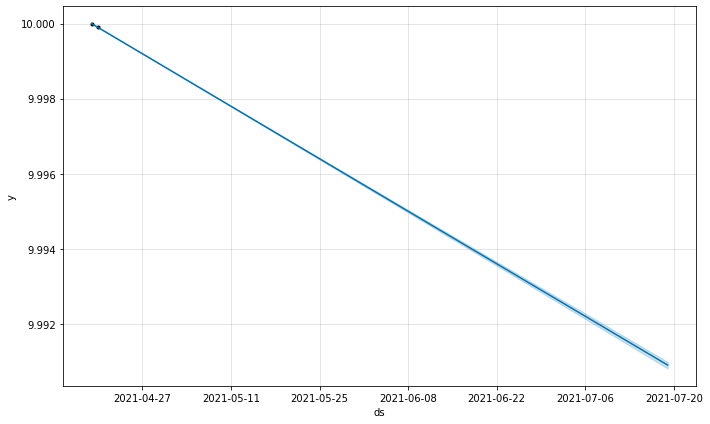

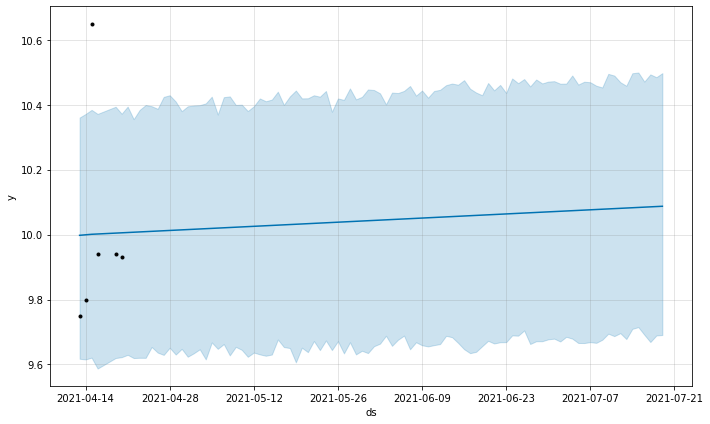

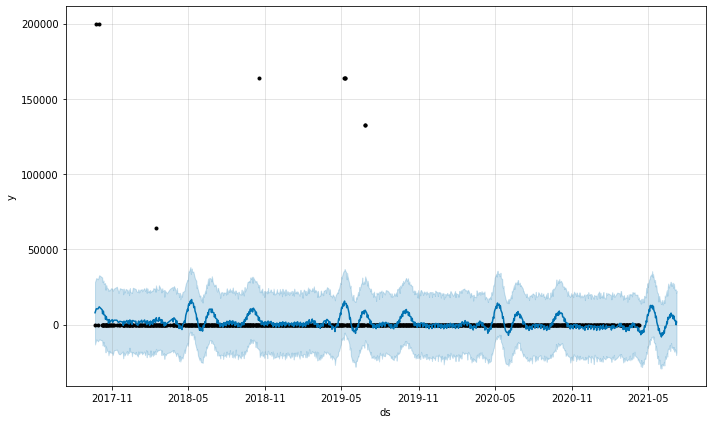

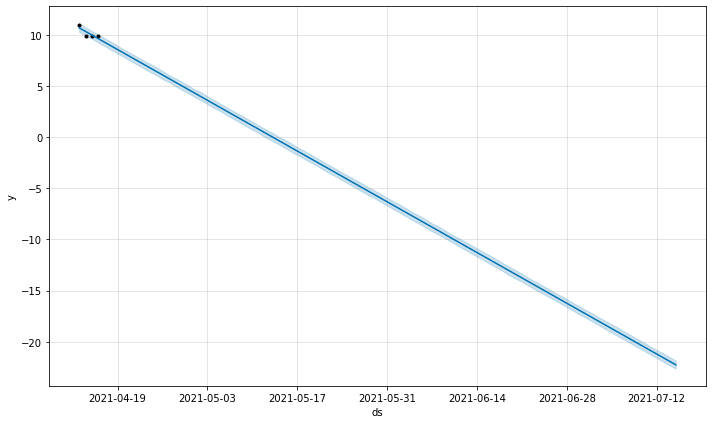

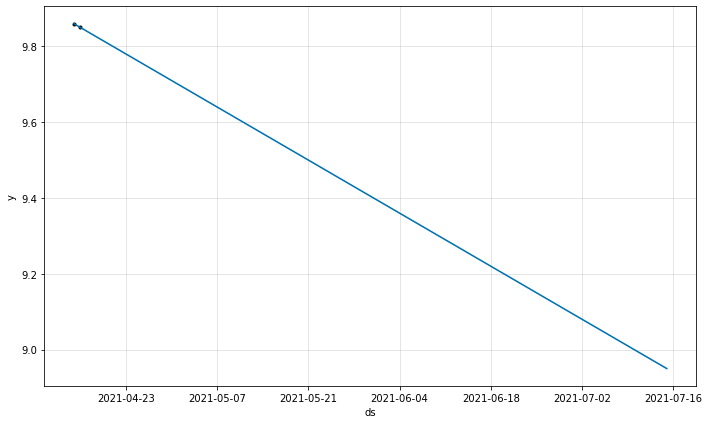

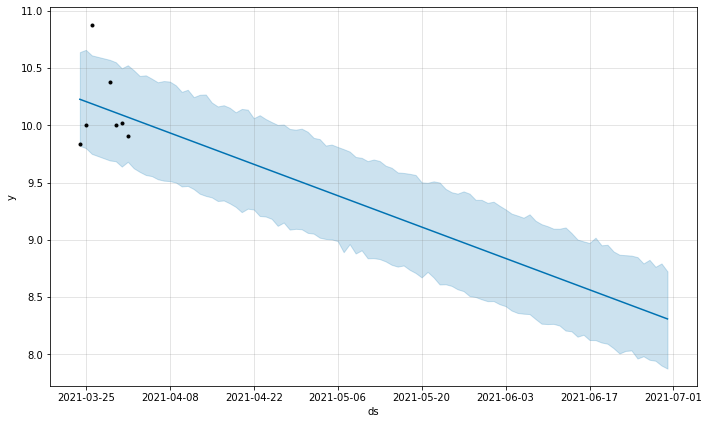

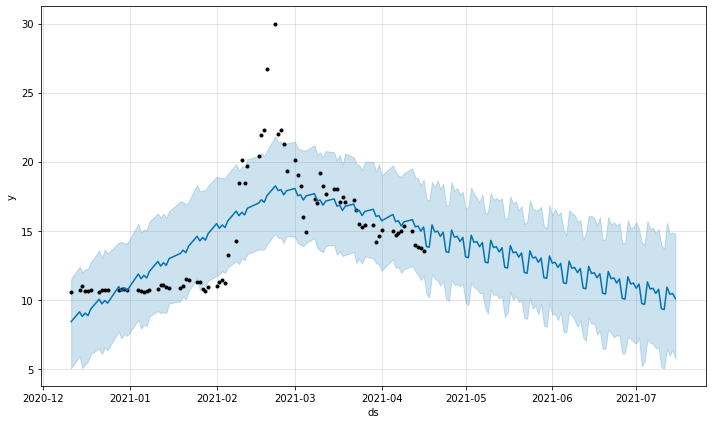

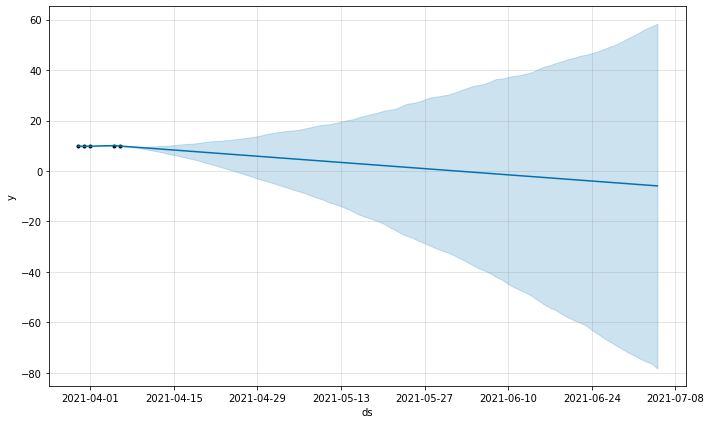

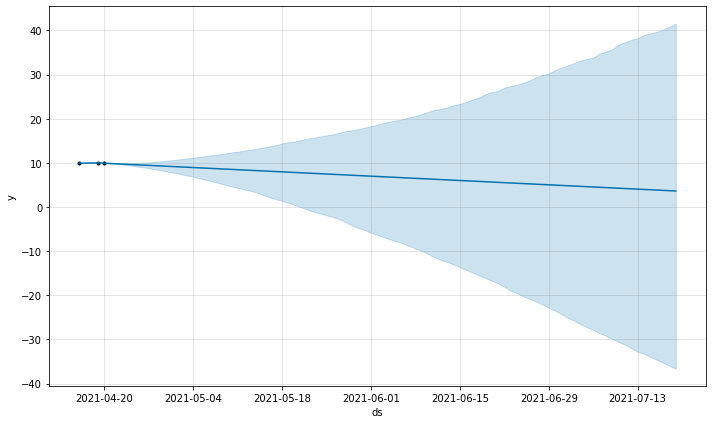

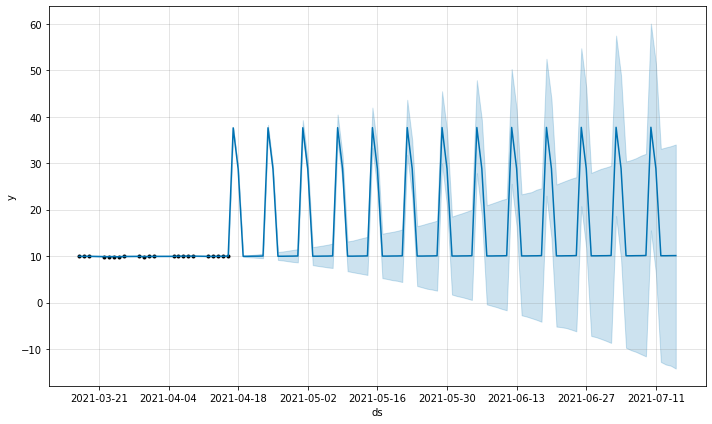

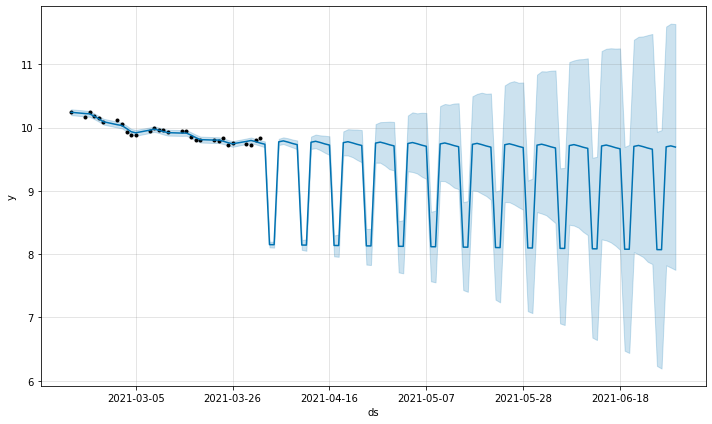

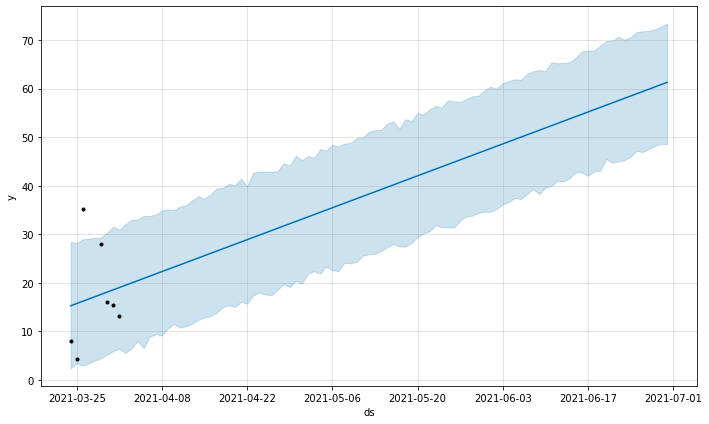

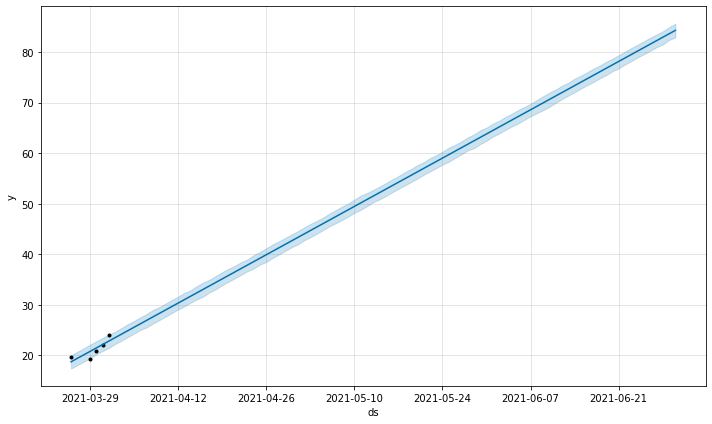

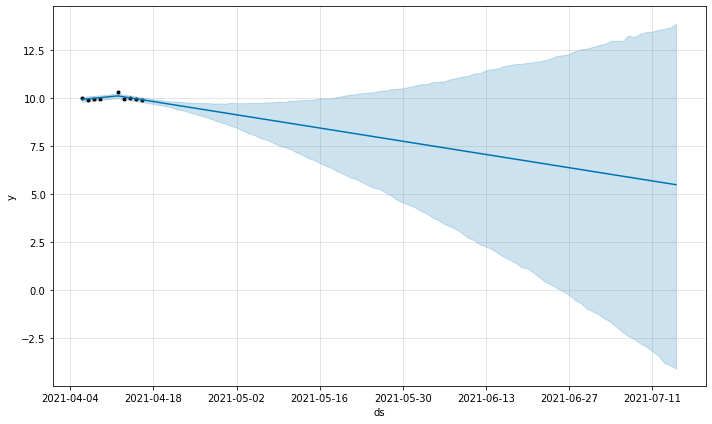

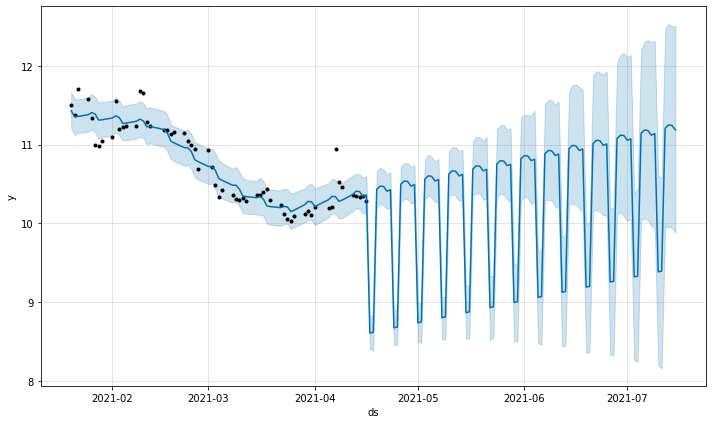

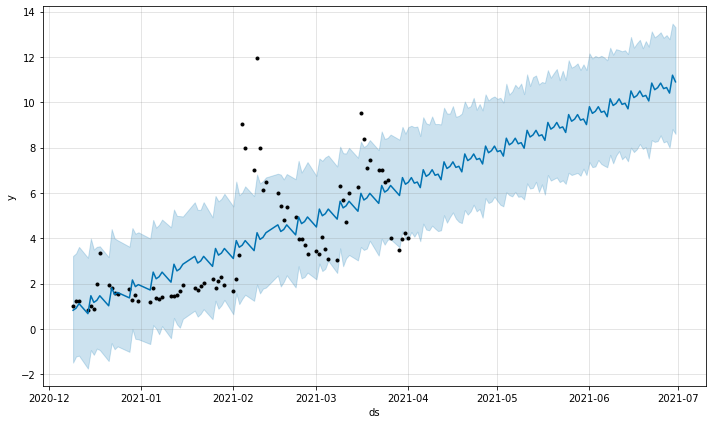

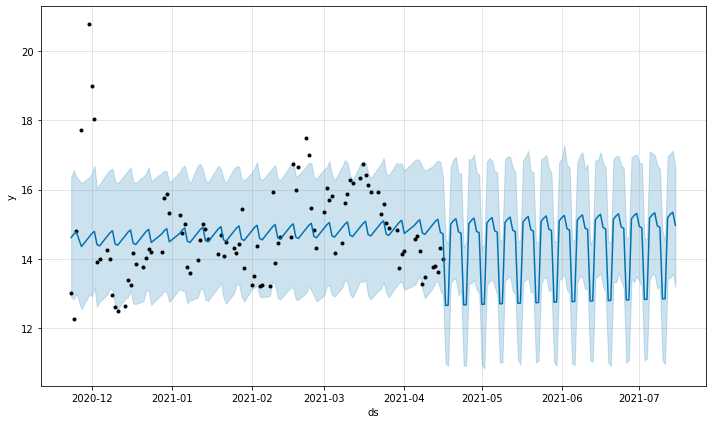

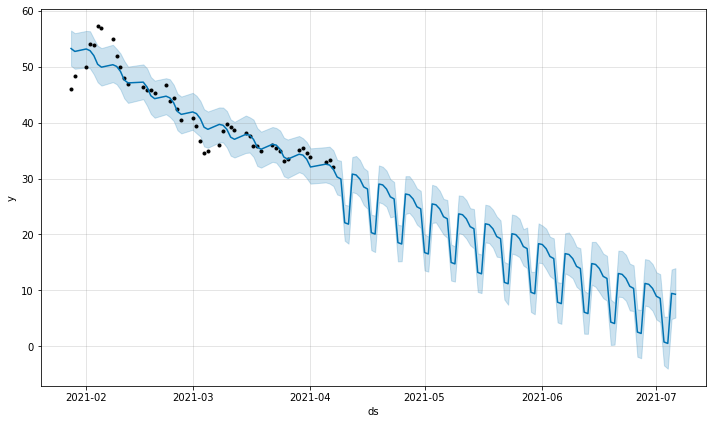

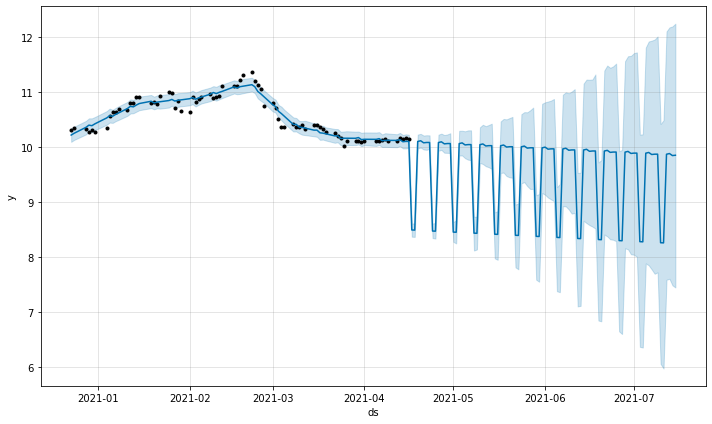

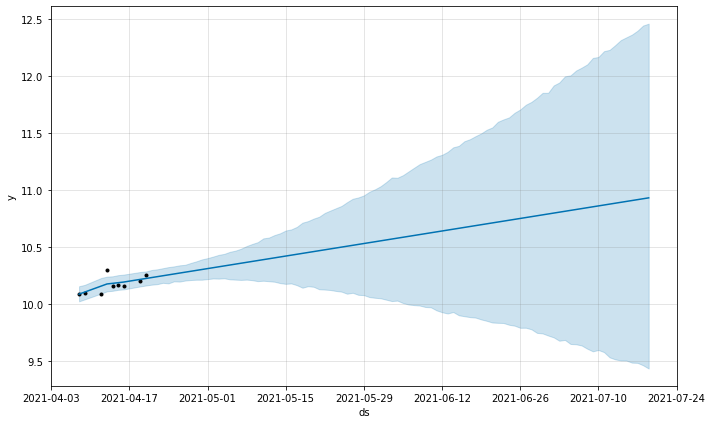

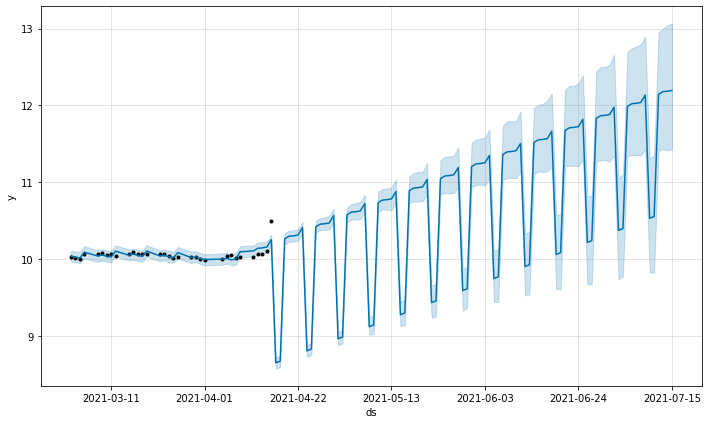

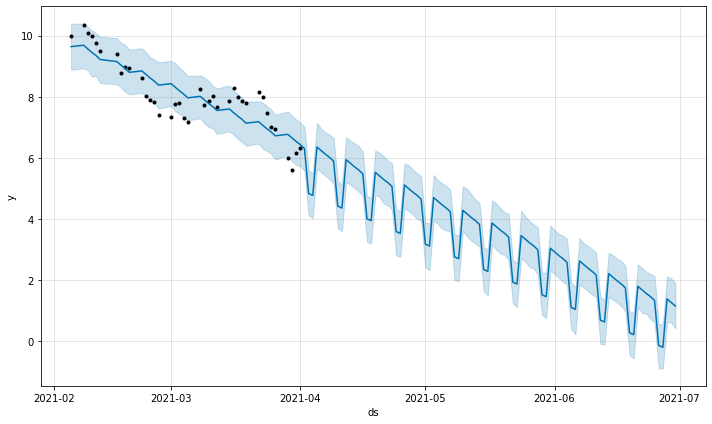

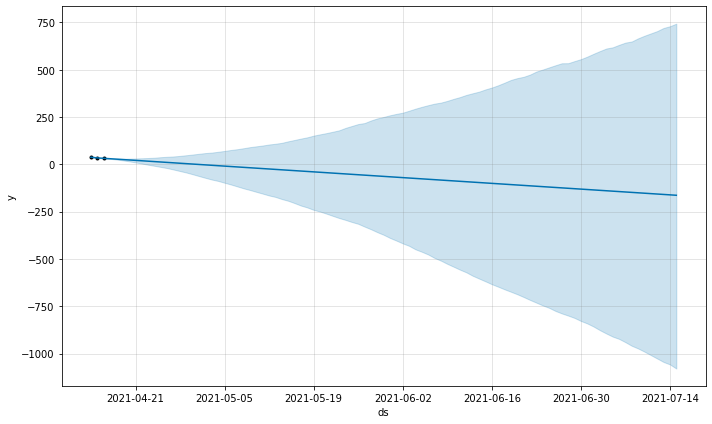

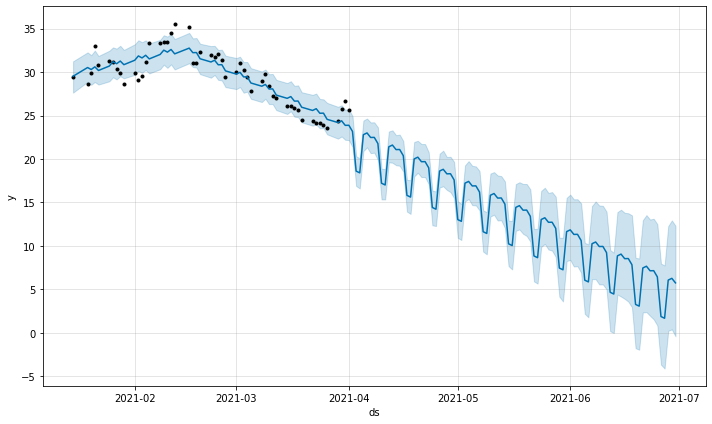

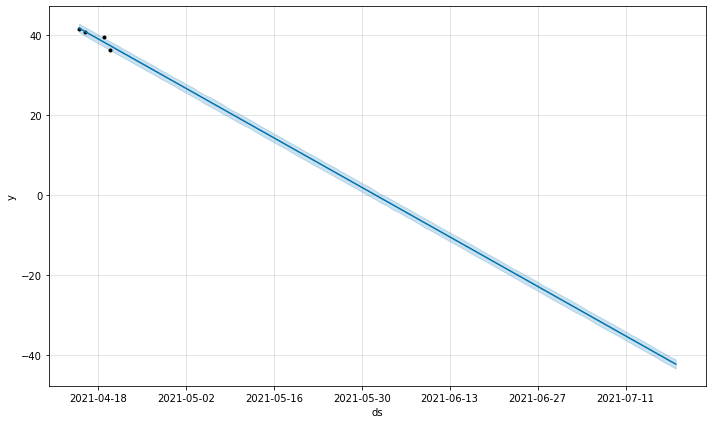

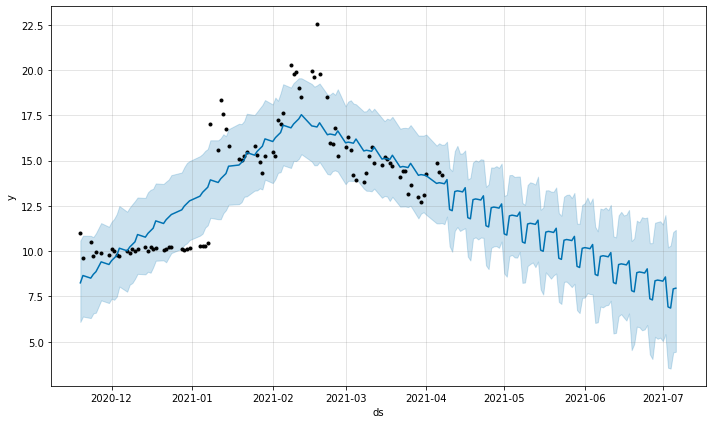

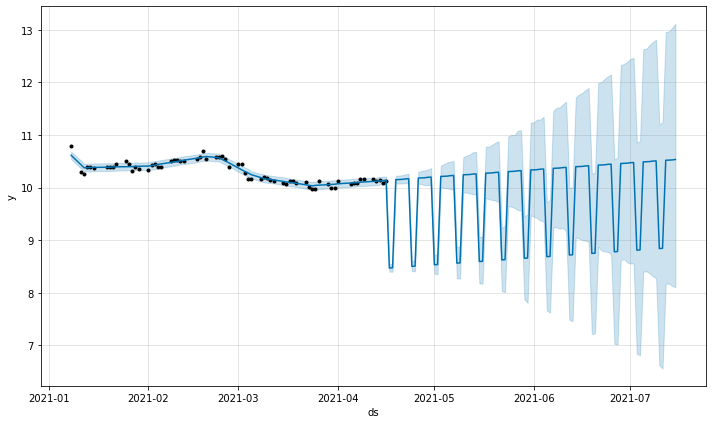

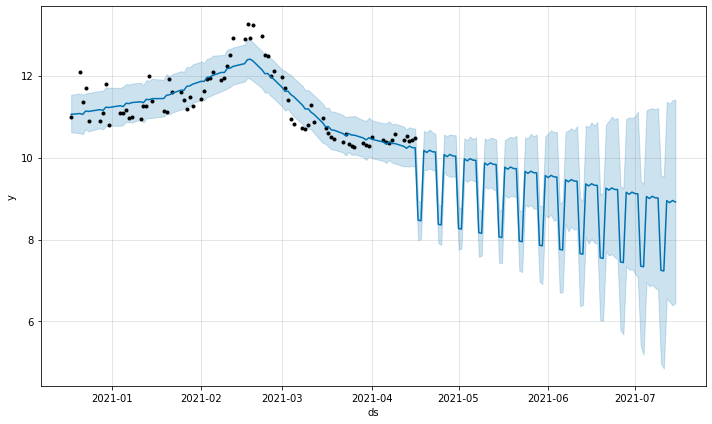

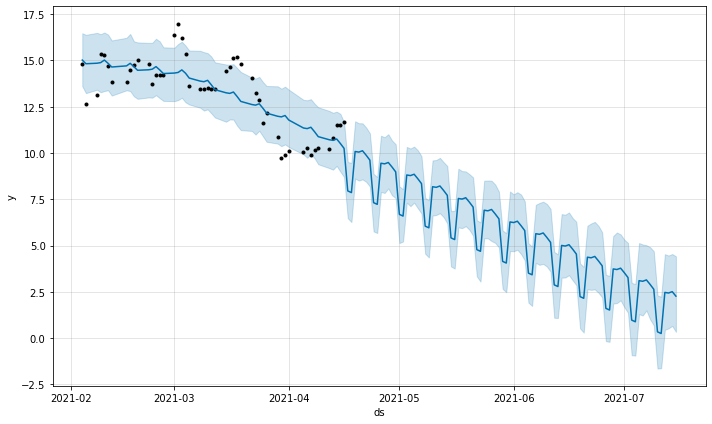

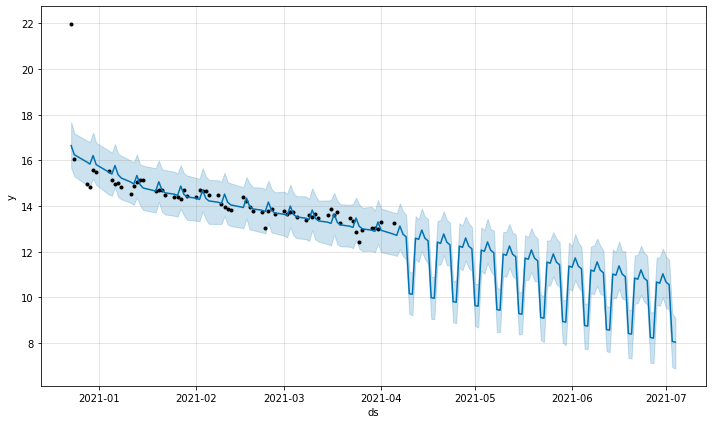

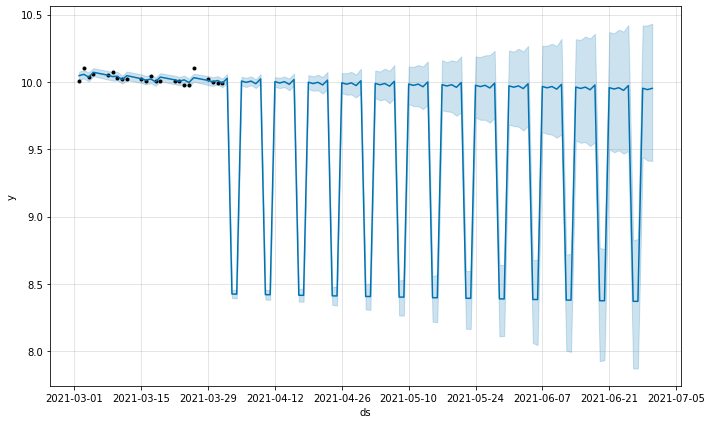

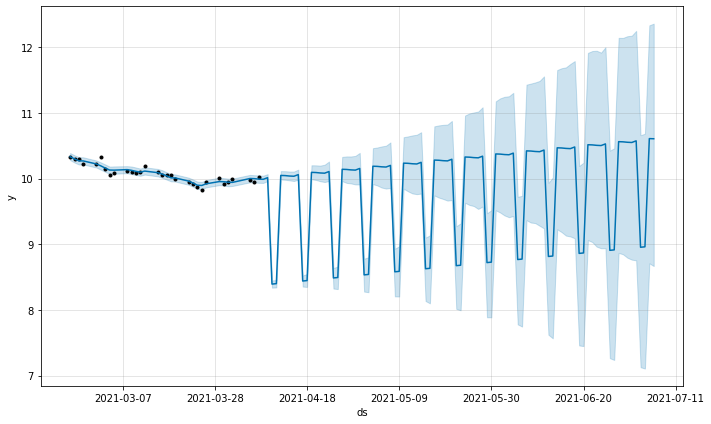

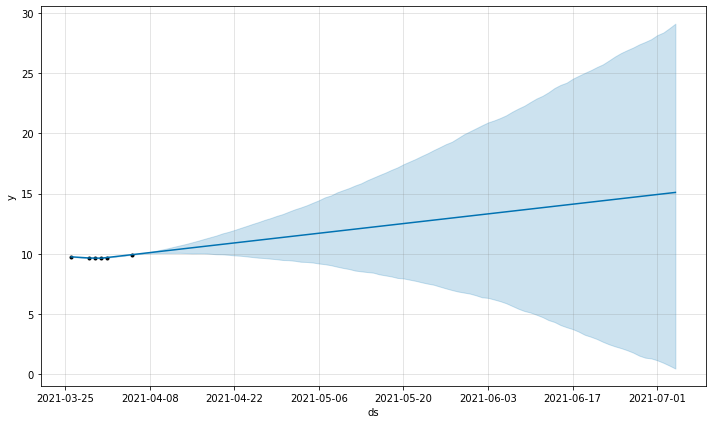

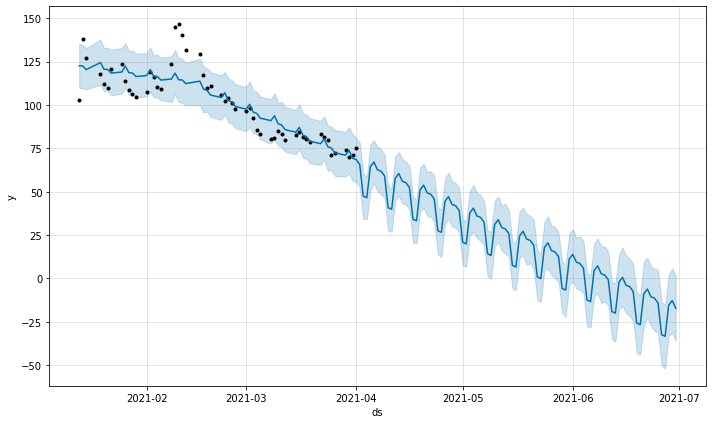

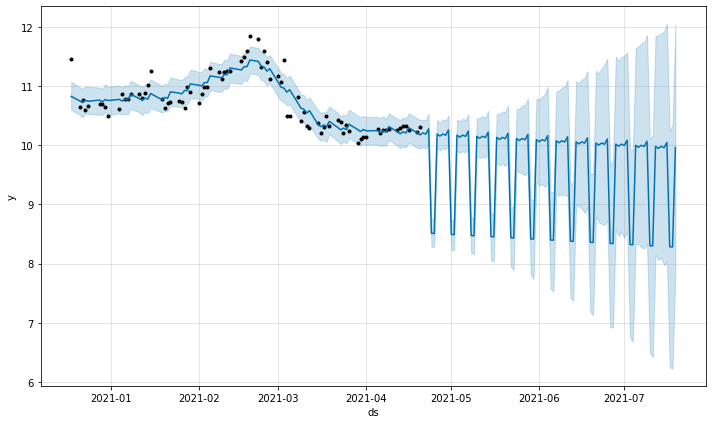

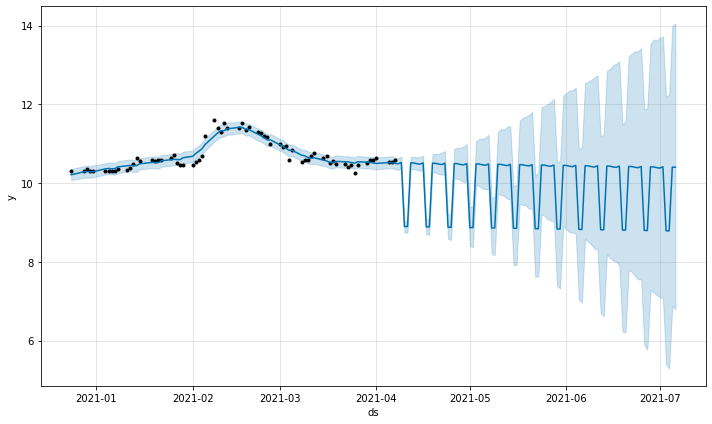

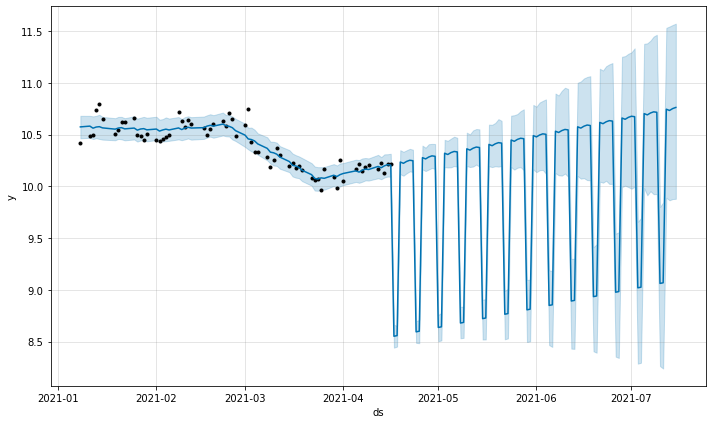

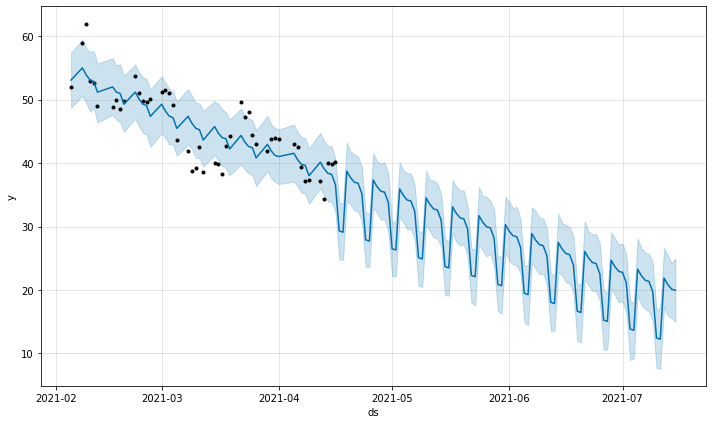

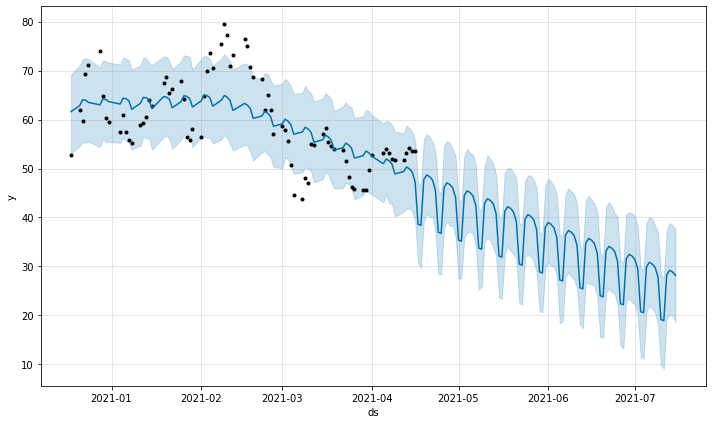

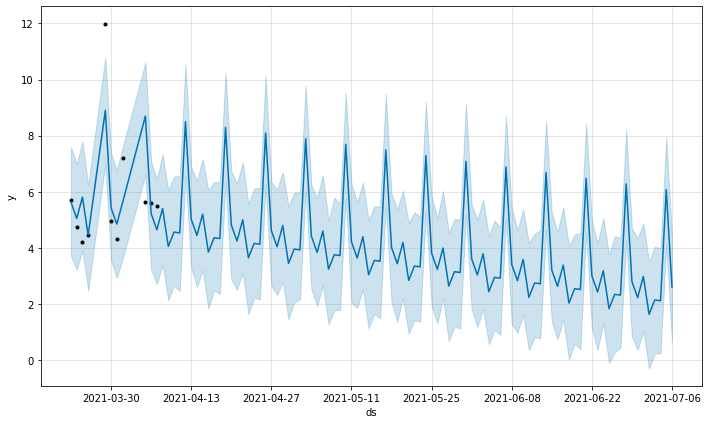

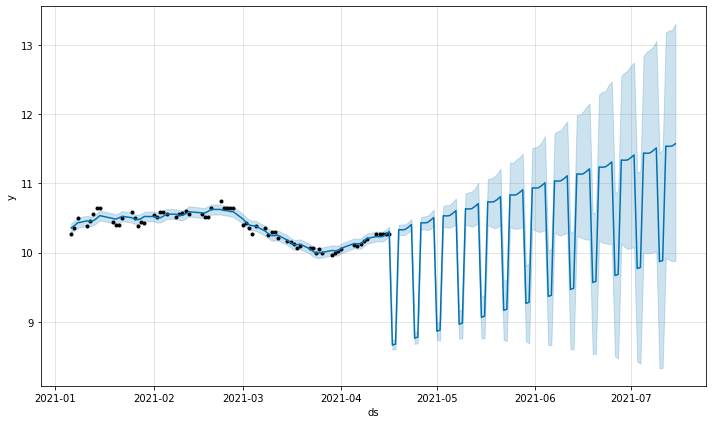

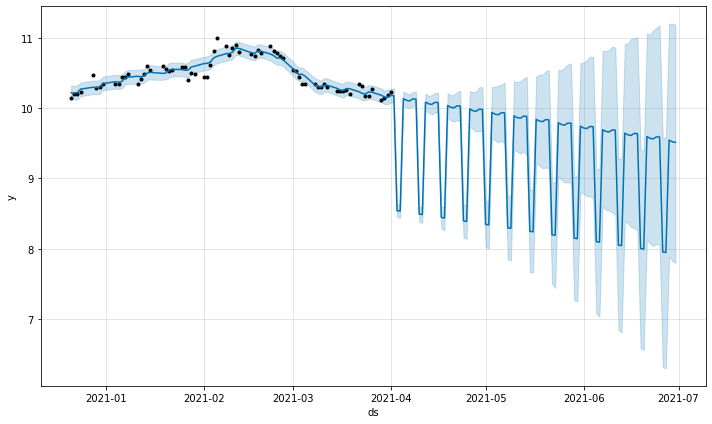

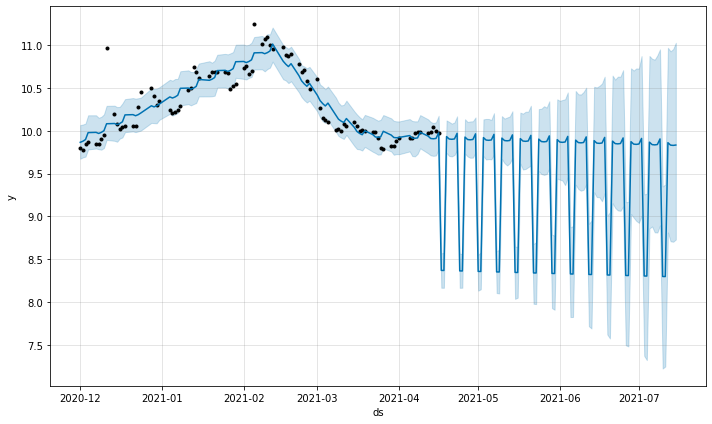

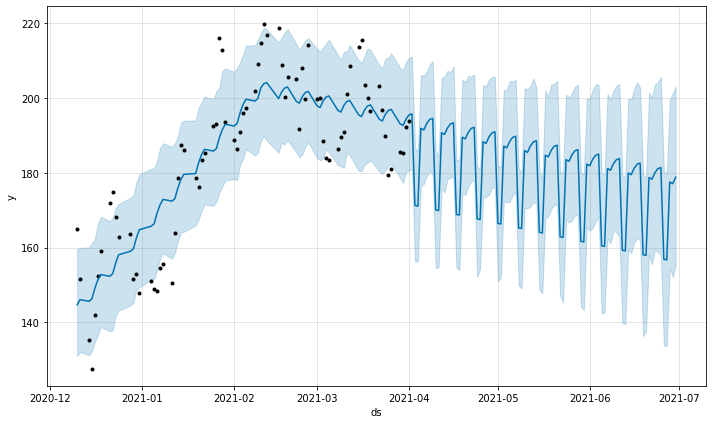

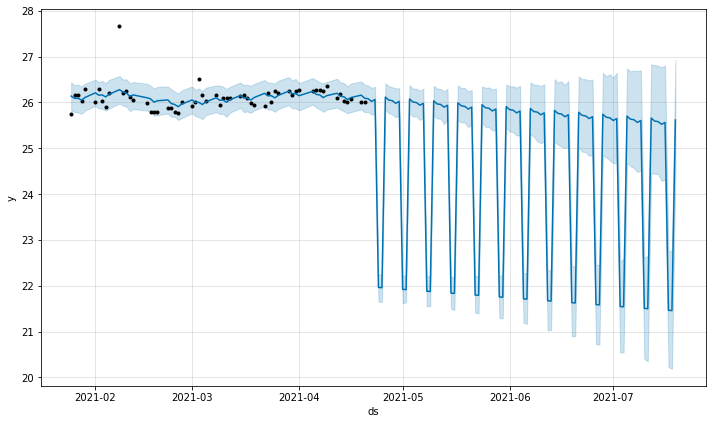

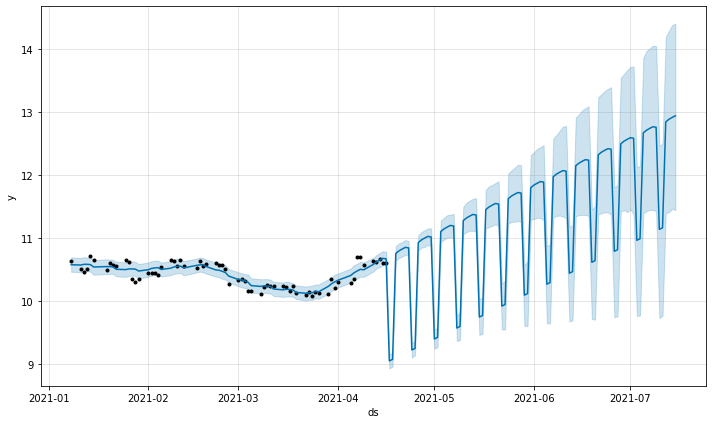

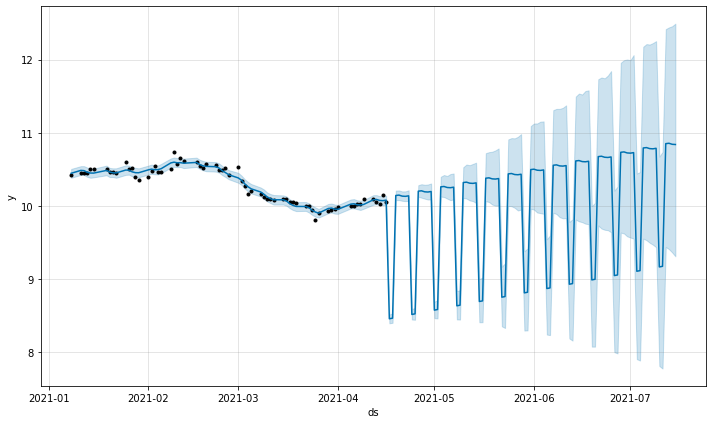

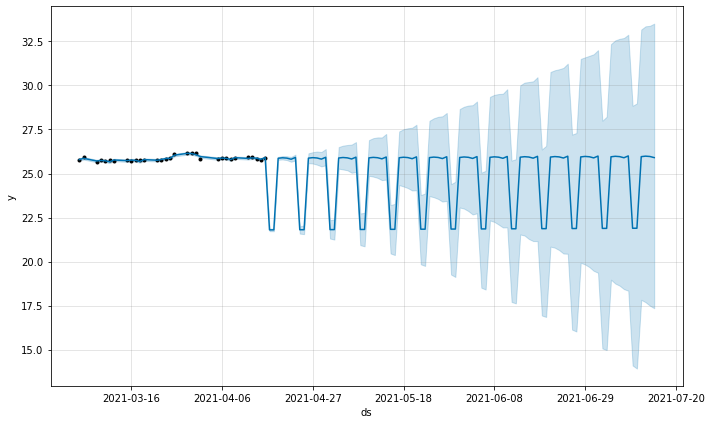

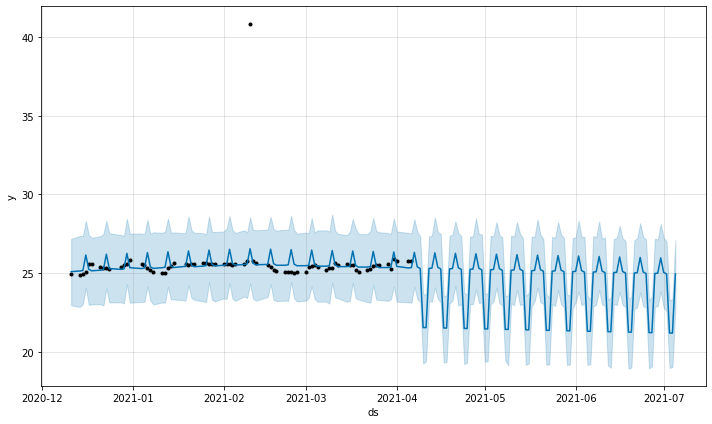

In [25]:

try:
    exp_id = mlflow.create_experiment('fbprophet_top', artifact_location=artifact_uri)
except Exception as e:
    display(e)
    exp_id= mlflow.get_experiment_by_name('fbprophet_top').experiment_id
display(exp_id)
for file in files:
    with mlflow.start_run(run_name=file, experiment_id=exp_id):
#         try: 
        periods=90
        mlflow.log_params({'file' : file,
                          'metric' : metric,
                          'rolling_window' : rolling_window,
                          'prediction_length' : periods})
        ## load dataframe
        dft = pd.read_csv(f's3://{file}')#.dropna()
        df = dft[['Unnamed: 0', metric]]
        df.columns = ['ds', 'y']
        m = Prophet(growth='linear', daily_seasonality=True)
        m.fit(df)
        future = m.make_future_dataframe(periods=periods)
        forecast = m.predict(future)
        fig = m.plot(forecast)
        
        mlflow.log_figure(fig, 'plot.png')
        forecast.to_csv('./forecast.csv')
        mlflow.log_artifact('./forecast.csv')
#             df_cv = cross_validation(m, horizon = '90 days')
#             df_p = performance_metrics(df_cv, rolling_window=rolling_window)
#             display(df_p)
#             mlflow.log_metrics({"rmse" : df_p.loc[0,'rmse'],
#                                 "mse" : df_p.loc[0,'mse'],
#                                 "mae" : df_p.loc[0,'mae'],
#                                 "mdape" : df_p.loc[0,'mdape'],
#                                 "coverage" : df_p.loc[0,'coverage']})   
#             mlflow.log_artifact(df_p.to_csv(), 'performance_metrics_df.csv'})
#         except Exception as e:
#             display(e)
#             mlflow.log_param('exception', str(e))


In [25]:
runs = mlflow.search_runs('exp_id')
display(runs)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,params.file,params.prediction_length,params.metric,params.rolling_window,params.exception,params.length of predeiction,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.runName
0,73c5a4e6c23342e488572c7537c31727,3,FAILED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 19:04:32.767000+00:00,2021-04-22 19:04:33.025000+00:00,sagemaker-us-east-2-287085956542/stock_data_ra...,90,low_window_20_shift_0_mean_percent_change_perc...,0.1,None,None,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,root,sagemaker-us-east-2-287085956542/stock_data_ra...
1,09f7bd54602f43a5b6fd11d09bc39257,3,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 19:04:26.071000+00:00,2021-04-22 19:04:32.741000+00:00,sagemaker-us-east-2-287085956542/stock_data_ra...,90,low_window_20_shift_0_mean_percent_change_perc...,0.1,None,None,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,root,sagemaker-us-east-2-287085956542/stock_data_ra...
2,7805ad4ae6ee4b98a681523caafb98f3,3,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 19:04:19.899000+00:00,2021-04-22 19:04:26.043000+00:00,sagemaker-us-east-2-287085956542/stock_data_ra...,90,low_window_20_shift_0_mean_percent_change_perc...,0.1,None,None,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,root,sagemaker-us-east-2-287085956542/stock_data_ra...
3,2bee1bd48e1c479d8440994653ac24c7,3,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 19:04:14.097000+00:00,2021-04-22 19:04:19.874000+00:00,sagemaker-us-east-2-287085956542/stock_data_ra...,90,low_window_20_shift_0_mean_percent_change_perc...,0.1,None,None,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,root,sagemaker-us-east-2-287085956542/stock_data_ra...
4,62418279b89543d4b0d028be3948dfdd,3,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 19:04:08.236000+00:00,2021-04-22 19:04:14.072000+00:00,sagemaker-us-east-2-287085956542/stock_data_ra...,90,low_window_20_shift_0_mean_percent_change_perc...,0.1,None,None,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,root,sagemaker-us-east-2-287085956542/stock_data_ra...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,4c57697c9ae944088013043d1c5b7a0a,3,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 18:41:00.716000+00:00,2021-04-22 18:41:01.518000+00:00,sagemaker-us-east-2-287085956542/stock_data_ra...,None,low_window_20_shift_0_mean_percent_change_perc...,0.1,name 'forecast' is not defined,90,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,root,None
69,8a08606213934b42aba508a956f23b4b,3,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 18:40:59.934000+00:00,2021-04-22 18:41:00.694000+00:00,sagemaker-us-east-2-287085956542/stock_data_ra...,None,low_window_20_shift_0_mean_percent_change_perc...,0.1,name 'forecast' is not defined,90,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,root,None
70,121e88f5e36544f886a1e4b6823ed7b1,3,FINISHED,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 18:40:57.537000+00:00,2021-04-22 18:40:59.893000+00:00,sagemaker-us-east-2-287085956542/stock_data_ra...,None,low_window_20_shift_0_mean_percent_change_perc...,0.1,name 'forecast' is not defined,90,LOCAL,/opt/conda/lib/python3.7/site-packages/ipykern...,root,None
71,c9769c56f968433e81f10990d725d893,3,RUNNING,s3://sagemaker-us-east-2-287085956542/mlflow_a...,2021-04-22 18:38:01.479000+00:00,NaT,None,None,None,None,None,None,None,None,None,None


After first pass, selecting the largest predicted gains, we found that the predictions are all stocks under a dollar, and therefore high potential risk. Following this, we take steps to weed these out with a filter in the original predictions. A further step could be weeding out based on downward swings or volatility (what metrics would we use for these?)